## Heart Disease Predictor


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Feature Engineering
- Model Training
- Model Evaluation
- Hyperparameter Tuning
- Model Deployment

### 1) Problem statement
- This project aims to develop a predictive model for identifying the presence of heart disease based on clinical and demographic features of patients. Leveraging a dataset containing information such as age, sex, chest pain type, blood pressure, cholesterol levels, and other medical attributes, the objective is to build a robust machine learning model capable of accurately classifying patients into two categories: those with heart disease and those without.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
- The data consists of 1025 rows and 14 columns .

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/heart.csv')

#### Show Top 5 Records

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Shape of the dataset

In [5]:
df.shape

(1025, 14)

### 2.2 Dataset information

- Age: Age of the patient
- Sex: Gender of the patient (0 = female, 1 = male)
- Chest pain type: This is categorical with 4 values
- Resting blood pressure: Blood pressure of the patient while at rest
- Serum cholesterol: Serum cholesterol level in mg/dl
- Fasting blood sugar: Whether the patient's fasting blood sugar is above 120 mg/dl (0 = no, 1 = yes)
- Resting electrocardiographic results: Categorical variable with values 0, 1, 2
- Maximum heart rate achieved: Maximum heart rate achieved during exercise
- Exercise induced angina: Whether the patient experienced angina during exercise (0 = no, 1 = yes)
- Oldpeak: ST depression induced by exercise relative to rest
- Slope: The slope of the peak exercise ST segment
- Number of major vessels: Number of major vessels colored by fluoroscopy (0-3)
- Thal: Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)
- Target: Presence of heart disease (0 = no, 1 = yes)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

723

In [8]:
df=df.drop_duplicates()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


#### There are 723 duplicate values in the data set so I remove all duplicate values.

### 3.3 Check data types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### 3.5 Check statistics of data set

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 3.7 Exploring Data

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 4. Exploring Data ( Visualization )

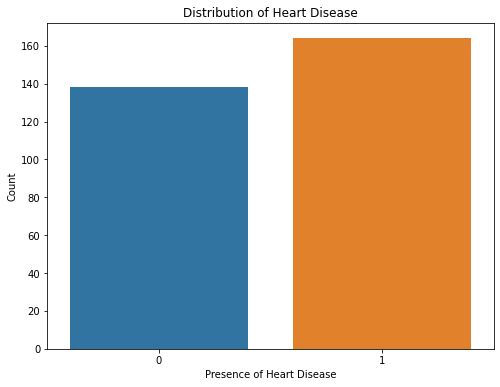

In [13]:
# Plot count of heart disease cases
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Distribution of Heart Disease')
plt.xlabel('Presence of Heart Disease')
plt.ylabel('Count')
plt.show()


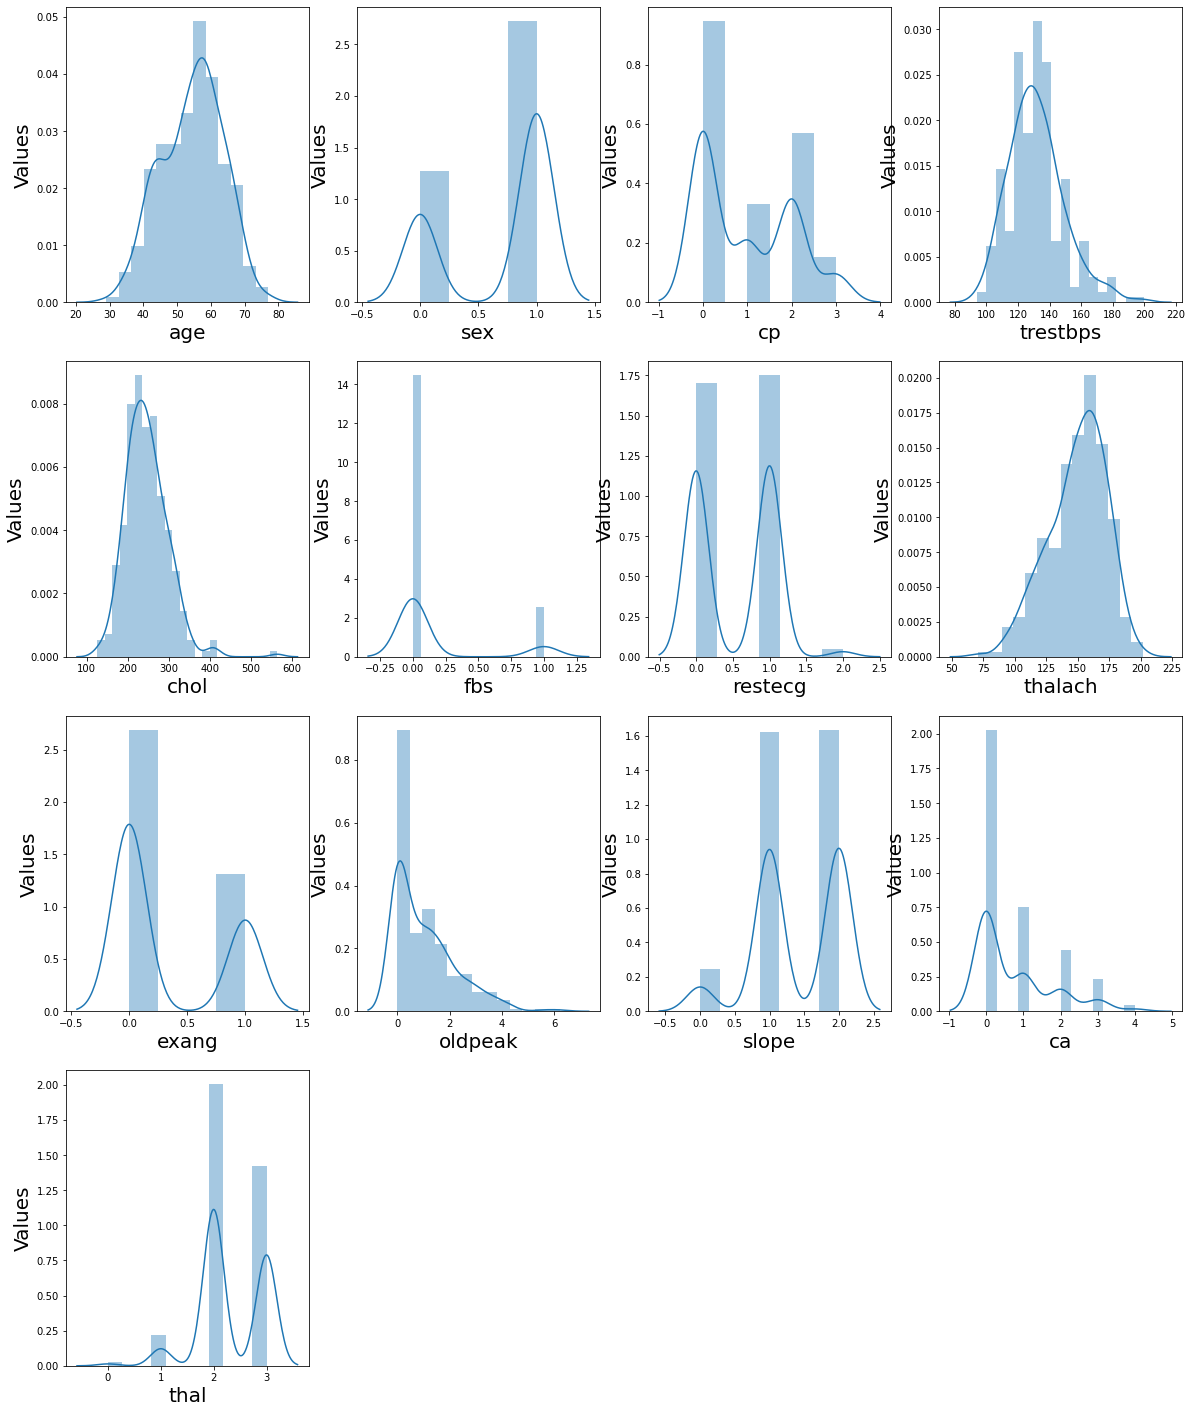

In [14]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

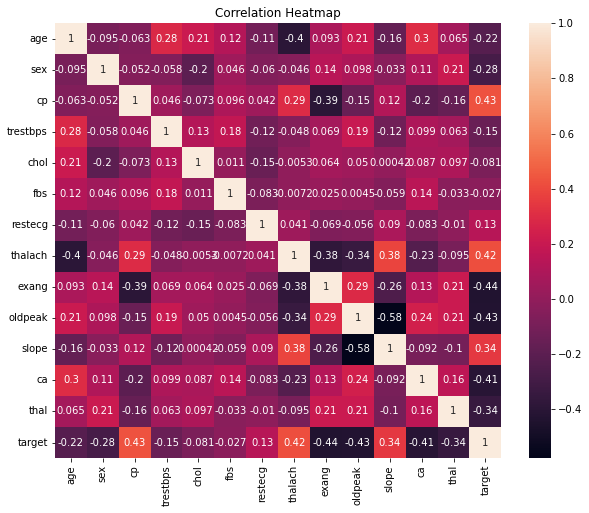

In [15]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

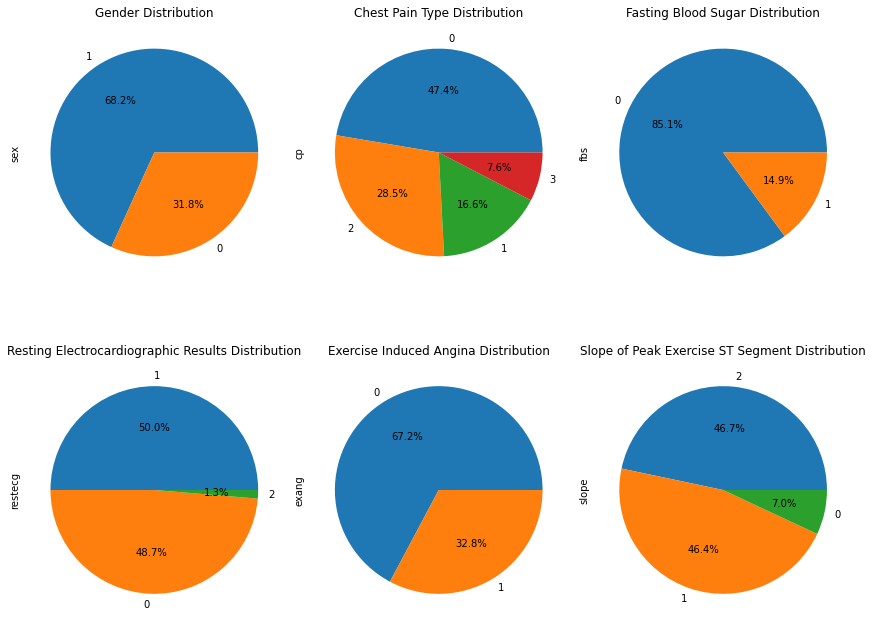

In [16]:
# Pie Charts
plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
df['sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
df['cp'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Chest Pain Type Distribution')

plt.subplot(2, 3, 3)
df['fbs'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Fasting Blood Sugar Distribution')

plt.subplot(2, 3, 4)
df['restecg'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Resting Electrocardiographic Results Distribution')

plt.subplot(2, 3, 5)
df['exang'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Exercise Induced Angina Distribution')

plt.subplot(2, 3, 6)
df['slope'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Slope of Peak Exercise ST Segment Distribution')

plt.tight_layout()
plt.show()

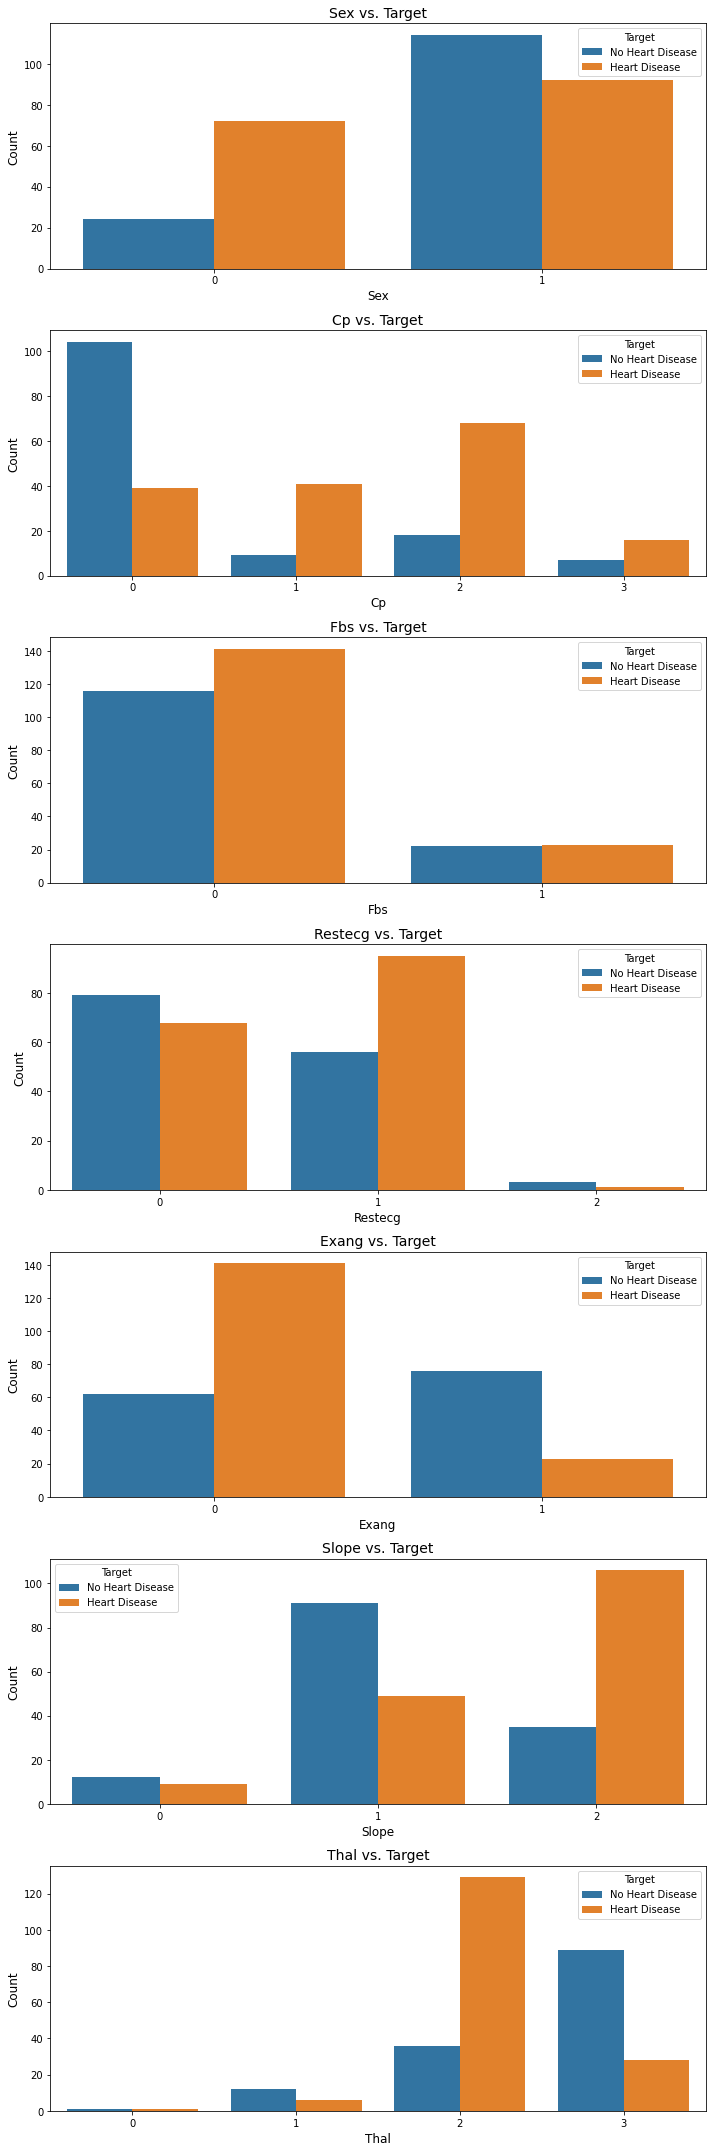

In [17]:
# Define the categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Create subplots for each categorical variable
fig, axs = plt.subplots(len(categorical_vars), 1, figsize=(10, 30))

# Iterate through each categorical variable and create a countplot
for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, hue='target', ax=axs[i])
    axs[i].set_xlabel(var.capitalize(), fontsize=12)
    axs[i].set_ylabel('Count', fontsize=12)
    axs[i].legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
    axs[i].set_title(f'{var.capitalize()} vs. Target', fontsize=14)

plt.tight_layout()
plt.show()

In [18]:
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for var in categorical_vars:
    unique_vals = df[var].unique()
    for val in unique_vals:
        percentage_by_target = df[df[var] == val].groupby("target")[var].count() * 100 / len(df[df[var] == val])
        print(f"Percentage of {var} variable with respect to target for value {val} is:")
        print(percentage_by_target)

Percentage of sex variable with respect to target for value 1 is:
target
0    55.339806
1    44.660194
Name: sex, dtype: float64
Percentage of sex variable with respect to target for value 0 is:
target
0    25.0
1    75.0
Name: sex, dtype: float64
Percentage of cp variable with respect to target for value 0 is:
target
0    72.727273
1    27.272727
Name: cp, dtype: float64
Percentage of cp variable with respect to target for value 1 is:
target
0    18.0
1    82.0
Name: cp, dtype: float64
Percentage of cp variable with respect to target for value 2 is:
target
0    20.930233
1    79.069767
Name: cp, dtype: float64
Percentage of cp variable with respect to target for value 3 is:
target
0    30.434783
1    69.565217
Name: cp, dtype: float64
Percentage of fbs variable with respect to target for value 0 is:
target
0    45.136187
1    54.863813
Name: fbs, dtype: float64
Percentage of fbs variable with respect to target for value 1 is:
target
0    48.888889
1    51.111111
Name: fbs, dtype: floa